<h2>Importing Libraries and Data</h2>

In [2]:
%%time
import pandas as pd
import numpy as np
from IPython.display import display
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression	
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
plt.style.use('ggplot')

CPU times: user 2.3 s, sys: 650 ms, total: 2.95 s
Wall time: 20.8 s


In [3]:
%%time
df_contract = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/contract.csv', encoding = "utf-8", parse_dates=[1])
df_internet = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/internet.csv', encoding = "utf-8")
df_personal = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/personal.csv', encoding = "utf-8")
df_phone = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/phone.csv', encoding = "utf-8")

CPU times: user 34.6 ms, sys: 9.79 ms, total: 44.4 ms
Wall time: 45.7 ms


<h1>Data Preprocessing</h1>

This portion just cleans up the data and gets it ready for further use. In this part, I also merged the dataframes into one, larger dataframe that allows for more efficient exploratory data analysis and also will allow for effective model training.

<h2>Contract Data</h2>

In [4]:
%%time
display(df_contract.sample(10))
df_contract.info


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5702,5287-QWLKY,2014-02-01,2020-01-01 00:00:00,Month-to-month,Yes,Credit card (automatic),105.10,7548.1
4032,4098-NAUKP,2014-06-01,No,Month-to-month,Yes,Electronic check,84.65,5683.6
4436,3639-XJHKQ,2018-07-01,No,Month-to-month,Yes,Electronic check,60.60,1297.8
3681,4433-JCGCG,2016-02-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,101.00,4680.05
3413,5294-DMSFH,2017-09-01,No,Month-to-month,Yes,Credit card (automatic),87.80,2621.75
762,7379-POKDZ,2019-07-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,70.30,208.85
5168,6000-APYLU,2019-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,80.80,713.1
6895,5126-RCXYW,2015-08-01,No,Two year,No,Credit card (automatic),46.00,2424.05
5358,6082-GLJIX,2018-08-01,No,Month-to-month,No,Mailed check,19.25,331.35
1269,8480-PPONV,2014-12-01,No,Two year,No,Bank transfer (automatic),115.55,7159.05


CPU times: user 12.1 ms, sys: 2.3 ms, total: 14.4 ms
Wall time: 13.9 ms


<bound method DataFrame.info of       customerID  BeginDate              EndDate            Type  \
0     7590-VHVEG 2020-01-01                   No  Month-to-month   
1     5575-GNVDE 2017-04-01                   No        One year   
2     3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW 2016-05-01                   No        One year   
4     9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...        ...                  ...             ...   
7038  6840-RESVB 2018-02-01                   No        One year   
7039  2234-XADUH 2014-02-01                   No        One year   
7040  4801-JZAZL 2019-03-01                   No  Month-to-month   
7041  8361-LTMKD 2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK 2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0                 Yes           Electronic check           29.85       

In [5]:
%%time
df_contract.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type', 'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'}, inplace=True)

df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB
CPU times: user 8.68 ms, sys: 1.19 ms, total: 9.87 ms
Wall time: 9.5 ms


In [6]:
%%time
print(df_contract.duplicated().sum())
print(df_contract.duplicated(subset=['customer_id', 'begin_date']).sum())
print(df_contract.duplicated(subset=['customer_id', 'end_date']).sum())
print(df_contract.duplicated(subset=['customer_id', 'type']).sum())
print(df_contract.duplicated(subset=['customer_id', 'paperless_billing']).sum())
print(df_contract.duplicated(subset=['customer_id', 'payment_method']).sum())
print(df_contract.duplicated(subset=['customer_id', 'monthly_charges']).sum())
print(df_contract.duplicated(subset=['customer_id', 'total_charges']).sum())

0
0
0
0
0
0
0
0
CPU times: user 16.9 ms, sys: 2.48 ms, total: 19.4 ms
Wall time: 17.4 ms


In [7]:
%%time
print(df_contract['type'].unique())
print(df_contract['payment_method'].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
CPU times: user 2.06 ms, sys: 1.25 ms, total: 3.31 ms
Wall time: 2.06 ms


<h2>Internet Plan Data</h2>

In [8]:
%%time
display(df_internet.sample(10))
df_internet.info()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4606,1455-HFBXA,Fiber optic,Yes,No,Yes,Yes,No,No
1700,5159-YFPKQ,Fiber optic,No,No,Yes,No,No,No
5238,2737-WFVYW,DSL,No,No,No,No,Yes,Yes
1113,3569-EDBPQ,Fiber optic,Yes,No,No,Yes,No,No
5486,2274-XUATA,DSL,Yes,Yes,Yes,Yes,Yes,Yes
538,5533-RJFTJ,DSL,No,No,Yes,No,No,No
234,7534-BFESC,Fiber optic,No,No,No,No,No,No
98,5299-RULOA,Fiber optic,Yes,No,No,No,Yes,Yes
4144,8821-XNHVZ,Fiber optic,No,No,No,No,Yes,No
2640,4585-HETAI,Fiber optic,No,No,Yes,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
CPU times: user 13.3 ms, sys: 1.89 ms, total: 15.2 ms
Wall time: 13.9 ms


In [9]:
%%time
df_internet.rename(columns={'customerID': 'customer_id', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'}, inplace=True)

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
CPU times: user 6.74 ms, sys: 916 µs, total: 7.66 ms
Wall time: 6.96 ms


In [10]:
%%time
print(df_internet.duplicated().sum())
print(df_internet.duplicated(subset=['customer_id', 'internet_service']).sum())
print(df_internet.duplicated(subset=['customer_id', 'online_security']).sum())
print(df_internet.duplicated(subset=['customer_id', 'online_backup']).sum())
print(df_internet.duplicated(subset=['customer_id', 'device_protection']).sum())
print(df_internet.duplicated(subset=['customer_id', 'tech_support']).sum())
print(df_internet.duplicated(subset=['customer_id', 'streaming_tv']).sum())
print(df_internet.duplicated(subset=['customer_id', 'streaming_movies']).sum())

0
0
0
0
0
0
0
0
CPU times: user 13.7 ms, sys: 1.51 ms, total: 15.2 ms
Wall time: 13.6 ms


In [11]:
%%time
internet_customers = len(df_internet) / len(df_contract) * 100
active_internet_customers = len(df_internet) / len(df_contract[df_contract['end_date'] == 'No']) * 100
print('The percentage of customers who have contracts who also have internet contracts is ', internet_customers, '%')
print('The percentage of customers who have active contracts who also have internet contracts is ', active_internet_customers, '%')

The percentage of customers who have contracts who also have internet contracts is  78.33309669175067 %
The percentage of customers who have active contracts who also have internet contracts is  106.6293003478933 %
CPU times: user 2.79 ms, sys: 2.05 ms, total: 4.84 ms
Wall time: 3.31 ms


In [12]:
%%time
print(df_internet['internet_service'].unique())

['DSL' 'Fiber optic']
CPU times: user 763 µs, sys: 196 µs, total: 959 µs
Wall time: 737 µs


In [13]:
%%time
display(df_internet.sample(10))

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
3261,7030-FZTFM,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
4924,3162-KKZXO,Fiber optic,No,No,Yes,No,Yes,Yes
2901,4993-JCRGJ,Fiber optic,No,No,Yes,Yes,No,No
5074,2474-BRUCM,Fiber optic,Yes,No,No,No,Yes,Yes
3524,8580-QVLOC,DSL,Yes,Yes,Yes,Yes,Yes,Yes
723,9734-YWGEX,Fiber optic,No,No,Yes,No,Yes,Yes
4804,9000-PLFUZ,DSL,No,Yes,No,No,Yes,Yes
850,0634-SZPQA,Fiber optic,Yes,No,No,No,Yes,No
5451,8685-WHQPW,Fiber optic,No,No,No,No,No,No
123,1679-JRFBR,Fiber optic,Yes,Yes,Yes,No,Yes,Yes


CPU times: user 7.29 ms, sys: 1.54 ms, total: 8.83 ms
Wall time: 7.63 ms


<h2>Customer Data</h2>

In [14]:
%%time
display(df_personal.sample(10))
df_personal.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
1439,0506-LVNGN,Female,1,No,No
5142,6408-OTUBZ,Female,0,No,No
871,1573-LGXBA,Male,0,Yes,Yes
992,4883-KCPZJ,Female,0,Yes,Yes
4177,3470-BTGQO,Male,0,No,Yes
6293,7977-HXJKU,Male,0,No,Yes
6109,8654-DHAOW,Female,0,No,No
1660,1171-TYKUR,Male,0,Yes,No
6874,4926-UMJZD,Female,0,Yes,No
5140,7577-SWIFR,Male,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
CPU times: user 11.2 ms, sys: 1.7 ms, total: 12.9 ms
Wall time: 11.6 ms


In [15]:
%%time
df_personal.rename(columns={'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents'}, inplace=True)
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
CPU times: user 6.16 ms, sys: 763 µs, total: 6.92 ms
Wall time: 6.26 ms


In [16]:
%%time
print(df_personal.duplicated().sum())
print(df_personal.duplicated(subset=['customer_id', 'gender']).sum())
print(df_personal.duplicated(subset=['customer_id', 'senior_citizen']).sum())
print(df_personal.duplicated(subset=['customer_id', 'partner']).sum())
print(df_personal.duplicated(subset=['customer_id', 'dependents']).sum())

0
0
0
0
0
CPU times: user 9.72 ms, sys: 1.35 ms, total: 11.1 ms
Wall time: 9.34 ms


<h2>Phone Data</h2>

In [17]:
%%time
display(df_phone.sample(10))
df_phone.info()

,customerID,MultipleLines
5854,9494-MRNYX,Yes
3962,4737-HOBAX,Yes
2342,7996-BPXHY,Yes
3266,9447-YPTBX,No
1509,4163-KIUHY,Yes
5869,5419-JPRRN,Yes
2627,0310-MVLET,Yes
2993,9194-GFVOI,Yes
2483,4295-YURET,No
4158,3181-MIZBN,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
CPU times: user 8.97 ms, sys: 1.7 ms, total: 10.7 ms
Wall time: 9.34 ms


In [18]:
%%time
df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': 'multiple_lines'}, inplace=True)
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
CPU times: user 4.62 ms, sys: 319 µs, total: 4.94 ms
Wall time: 4.76 ms


In [19]:
%%time
print(df_phone.duplicated().sum())

0
CPU times: user 2.76 ms, sys: 1.57 ms, total: 4.33 ms
Wall time: 2.5 ms


In [20]:
%%time
phone_customers = len(df_phone) / len(df_contract) * 100
active_phone_customers = len(df_phone) / len(df_contract[df_contract['end_date'] == 'No']) * 100
print('The percentage of customers who have contracts who also have phone contracts is ', phone_customers, '%')
print('The percentage of customers who have active contracts who also have phone contracts is ', active_phone_customers, '%')

The percentage of customers who have contracts who also have phone contracts is  90.31662643759762 %
The percentage of customers who have active contracts who also have phone contracts is  122.94163123308851 %
CPU times: user 2.39 ms, sys: 1.3 ms, total: 3.69 ms
Wall time: 2.46 ms


<h2>Merging the Dataframes</h2>

In [21]:
%%time
df_merge = df_contract.merge(df_personal,
                             left_on='customer_id', right_on='customer_id',
                             suffixes=['_contract', '_personal'])


CPU times: user 5.88 ms, sys: 1.8 ms, total: 7.68 ms
Wall time: 6.33 ms


In [22]:
%%time
display(df_merge.sample(10))
df_merge.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents
3820,9481-IEBZY,2014-02-01,No,Month-to-month,Yes,Credit card (automatic),112.90,8061.5,Male,1,Yes,No
2514,8922-LIEGH,2017-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,89.70,2187.55,Female,1,No,No
6695,6253-GNHWH,2014-03-01,No,Two year,No,Mailed check,71.10,5224.95,Female,0,Yes,Yes
5055,6925-BAYGL,2015-09-01,No,Two year,No,Credit card (automatic),25.10,1275.6,Female,1,Yes,No
1287,8800-ZKRFW,2017-08-01,No,Month-to-month,Yes,Electronic check,107.50,3242.5,Female,0,Yes,Yes
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes
1802,7492-TAFJD,2019-07-01,No,Two year,No,Mailed check,38.55,280,Male,0,Yes,Yes
2409,3275-RHRNE,2017-10-01,No,One year,Yes,Credit card (automatic),60.00,1682.05,Male,0,Yes,Yes
5614,3301-VKTGC,2014-06-01,No,One year,Yes,Bank transfer (automatic),85.50,5696.6,Male,0,Yes,Yes
2852,5485-ITNPC,2014-08-01,No,Two year,Yes,Bank transfer (automatic),85.90,5595.3,Male,0,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 660.4+ KB
CPU times: user 18 ms, sys: 1.79 ms, tot

In [23]:
%%time
df_merge_1 = df_merge.merge(df_internet,
                             left_on='customer_id',
                             right_on='customer_id',
                             how='outer',
                             suffixes=['_merge', '_internet'])


CPU times: user 6.02 ms, sys: 1.85 ms, total: 7.87 ms
Wall time: 6.63 ms


In [24]:
%%time
display(df_merge_1.sample(10))
df_merge_1.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
3371,4946-EDSEW,2019-01-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,19.25,180.3,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3521,2550-AEVRU,2015-05-01,No,One year,No,Electronic check,53.45,3053,Female,0,Yes,Yes,DSL,Yes,Yes,No,No,No,No
6459,3256-EZDBI,2015-11-01,No,Month-to-month,Yes,Credit card (automatic),29.45,1459.35,Male,1,Yes,No,DSL,No,Yes,No,No,No,No
980,3318-ISQFQ,2018-06-01,No,Month-to-month,Yes,Bank transfer (automatic),19.50,413,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,7595-EUIVN,2019-10-01,2019-11-01 00:00:00,Month-to-month,No,Electronic check,75.80,75.8,Female,0,No,No,Fiber optic,No,Yes,No,No,No,No
4279,8815-LMFLX,2018-01-01,No,Month-to-month,Yes,Bank transfer (automatic),25.40,546.85,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5988,6828-HMKWP,2019-02-01,No,Two year,No,Bank transfer (automatic),21.05,262.05,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2983,4674-HGNUA,2014-03-01,No,Two year,No,Credit card (automatic),89.90,6457.15,Male,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes
5899,9943-VSZUV,2014-07-01,No,Month-to-month,Yes,Mailed check,75.70,5060.85,Male,1,No,No,Fiber optic,No,No,No,No,No,No
554,5301-GAUUY,2017-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),80.35,2596.15,Male,0,No,No,Fiber optic,No,Yes,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [25]:
%%time
print(df_merge_1.isna().sum())
df_merge_1 = df_merge_1.fillna('No Internet Plan')
print(df_merge_1.isna().sum())

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
dtype: int64
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64
CPU times: user 22.7 ms, sys: 2.91 ms, tota

In [26]:
%%time
df_customer_info = df_merge_1.merge(df_phone,
                             left_on='customer_id',
                             right_on='customer_id',
                             how='outer',
                             suffixes=['_merge', '_phone'])

CPU times: user 6.1 ms, sys: 2.06 ms, total: 8.16 ms
Wall time: 7.06 ms


<h2>Fixing the New Dataframe<h2>

In [27]:
%%time
display(df_customer_info.sample(10))
df_customer_info.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
4895,1394-SUIUH,2016-06-01,No,Month-to-month,Yes,Electronic check,85.15,3670.5,Female,1,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,No
6603,2257-BOVXD,2018-12-01,No,Month-to-month,Yes,Credit card (automatic),66.60,979.5,Male,0,Yes,No,DSL,No,No,No,Yes,Yes,No,Yes
6122,7609-NRNCA,2018-09-01,No,One year,No,Mailed check,19.55,280.85,Female,0,No,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No
1140,9553-DLCLU,2019-01-01,No,Two year,No,Credit card (automatic),88.95,1161.75,Female,0,No,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2549,0188-GWFLE,2019-12-01,No,Month-to-month,No,Mailed check,20.05,33.7,Male,0,No,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No
3636,6319-QSUSR,2019-03-01,No,Month-to-month,No,Credit card (automatic),19.70,216.2,Female,0,No,Yes,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No
30,3841-NFECX,2014-03-01,No,Two year,Yes,Credit card (automatic),96.35,6766.95,Female,1,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,Yes
2451,3325-FUYCG,2017-06-01,2019-10-01 00:00:00,One year,No,Electronic check,106.10,2847.4,Male,0,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Yes
4092,0670-KDOMA,2020-01-01,No,Month-to-month,Yes,Mailed check,20.25,20.25,Female,0,No,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No
6205,7547-EKNFS,2016-06-01,2019-12-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35,Male,0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [28]:
%%time
print(df_customer_info.isna().sum())
df_customer_info = df_customer_info.fillna('No Phone Plan')
print(df_customer_info.isna().sum())

customer_id            0
begin_date             0
end_date               0
type                   0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          0
gender                 0
senior_citizen         0
partner                0
dependents             0
internet_service       0
online_security        0
online_backup          0
device_protection      0
tech_support           0
streaming_tv           0
streaming_movies       0
multiple_lines       682
dtype: int64
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64
CPU times: use

I noted that certain columns had blank spaces in them rather than null values, so to cover those bases, I added code to replace those values as needed.

In [29]:
%%time
df_customer_info['total_charges'] = df_customer_info['total_charges'].where((df_customer_info['total_charges'] != ' ') , '0') 
df_customer_info['monthly_charges'] = df_customer_info['monthly_charges'].where((df_customer_info['monthly_charges'] != ' ') , '0')
#df_customer_info['begin_date'] = df_customer_info['begin_date'].where((df_customer_info['begin_date'] != '-') , '') 
df_customer_info['begin_date'] = df_customer_info['begin_date'].where((df_customer_info['begin_date'] != ' ') , '2014-02-01') 
df_customer_info['type'] = df_customer_info['type'].where((df_customer_info['type'] != ' ') , 'None') 
df_customer_info['paperless_billing'] = df_customer_info['paperless_billing'].where((df_customer_info['paperless_billing'] != ' ') , 'No') 
df_customer_info['payment_method'] = df_customer_info['payment_method'].where((df_customer_info['payment_method'] != ' ') , 'None') 
df_customer_info['gender'] = df_customer_info['gender'].where((df_customer_info['gender'] != ' ') , 'None') 
df_customer_info['senior_citizen'] = df_customer_info['senior_citizen'].where((df_customer_info['senior_citizen'] != ' ') , 0)
df_customer_info['partner'] = df_customer_info['partner'].where((df_customer_info['partner'] != ' ') , 'No')
df_customer_info['dependents'] = df_customer_info['dependents'].where((df_customer_info['dependents'] != ' ') , 'No')
df_customer_info['internet_service'] = df_customer_info['internet_service'].where((df_customer_info['internet_service'] != ' ') , 'No Internet Plan')
df_customer_info['online_security'] = df_customer_info['online_security'].where((df_customer_info['online_security'] != ' ') , 'No')
df_customer_info['online_backup'] = df_customer_info['online_backup'].where((df_customer_info['online_backup'] != ' ') , 'No')
df_customer_info['online_backup'] = df_customer_info['online_backup'].where((df_customer_info['online_backup'] != ' ') , 'No')
df_customer_info['tech_support'] = df_customer_info['tech_support'].where((df_customer_info['tech_support'] != ' ') , 'No')
df_customer_info['streaming_tv'] = df_customer_info['streaming_tv'].where((df_customer_info['streaming_tv'] != ' ') , 'No')
df_customer_info['streaming_movies'] = df_customer_info['streaming_movies'].where((df_customer_info['streaming_movies'] != ' ') , 'No')
df_customer_info['multiple_lines'] = df_customer_info['multiple_lines'].where((df_customer_info['multiple_lines'] != ' ') , 'No Phone Plan')

CPU times: user 18.3 ms, sys: 1.86 ms, total: 20.1 ms
Wall time: 19.1 ms


In [30]:
%%time
df_customer_info['total_charges'] = df_customer_info['total_charges'].astype('float')
df_customer_info['monthly_charges'] = df_customer_info['monthly_charges'].astype('float')
#df_customer_info['begin_date'] = pd.to_numeric(df_customer_info['begin_date'])

CPU times: user 2.32 ms, sys: 546 µs, total: 2.87 ms
Wall time: 2.68 ms


In [31]:
%%time
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

<h2>Exploratory Data Analysis</h2>
Pairplots do not work here because the data is primarily categorical. I did some initial data analysis, but due to the sheer amount of features this data has, I determined that the models are going to be better to express predictions.

This graph looks at the trend of contract beginning dates. The greatest number started in February 2014, which may be the first time a promotion was run. Aftre that, many started in Fall 2019. Perhaps this was a promotion period as well. 

begin_date
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: count, Length: 77, dtype: int64


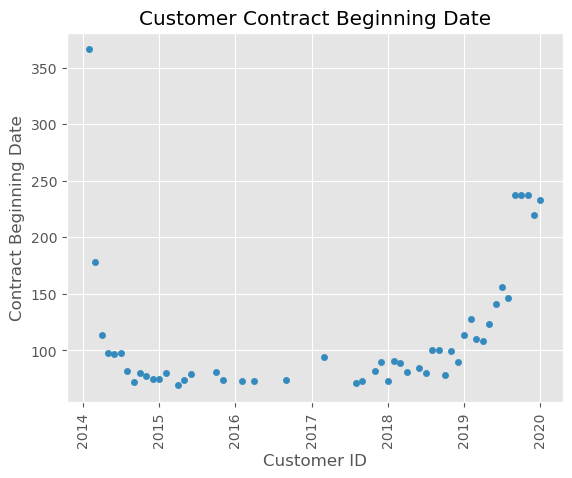

CPU times: user 236 ms, sys: 17.8 ms, total: 253 ms
Wall time: 305 ms


In [32]:
%%time
print(df_customer_info['begin_date'].value_counts())

df_begin = df_customer_info.groupby('begin_date')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'begin_date', 'customer_id':'customer_id'}).head(50)
df_begin.plot(kind='scatter',
              x='begin_date',
              y='customer_id',
              xlabel='Customer ID',
              ylabel='Contract Beginning Date',
              title='Customer Contract Beginning Date')
plt.xticks(rotation=90)
plt.show()

This graph looks at contract ending date. What is interesting about this data, is that other than a lack of ending date, there are only three other ending dates. In addition, approximately 73% of contracts do not even have an end date.

              end_date  customer_id
0                   No         5174
1  2019-11-01 00:00:00          485
2  2019-12-01 00:00:00          466
3  2020-01-01 00:00:00          460
4  2019-10-01 00:00:00          458


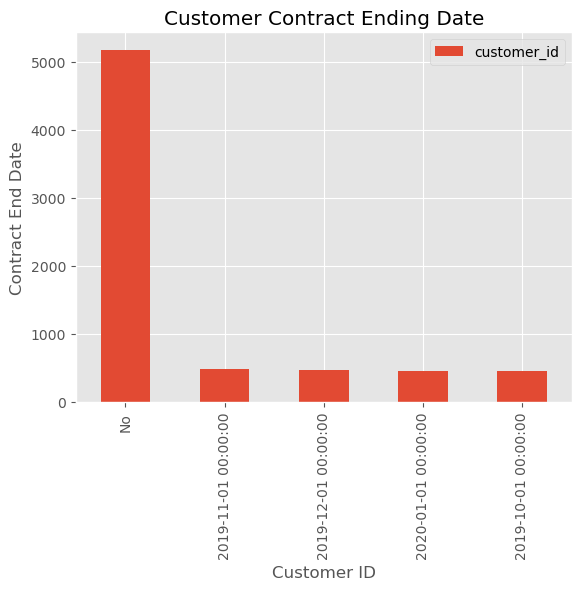

The percentage of customers that do not have end dates is 73.4630129206304 %
CPU times: user 162 ms, sys: 10.5 ms, total: 172 ms
Wall time: 169 ms


In [33]:
%%time
df_end = df_customer_info.groupby('end_date')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'end_date', 'customer_id':'customer_id'})
print(df_end)
df_end.plot(kind='bar',
              x='end_date',
              y='customer_id',
              #bins=20,
              xlabel='Customer ID',
              ylabel='Contract End Date',
              title='Customer Contract Ending Date')
plt.xticks(rotation=90)
plt.show()
end_date_data = len(df_customer_info[df_customer_info['end_date'] == 'No']) / len(df_customer_info['end_date']) * 100
print('The percentage of customers that do not have end dates is', end_date_data, '%')

This graph demonstrates that the majority of customers pay or paid by electronic check. Mailed check is the least popular option, which, given that the data only goes back to 2013, is unsurprising. What is of note is that bank transfer and credit card payment are quite a bit lower than electronic check. This may be due to company policies or fees around payments.

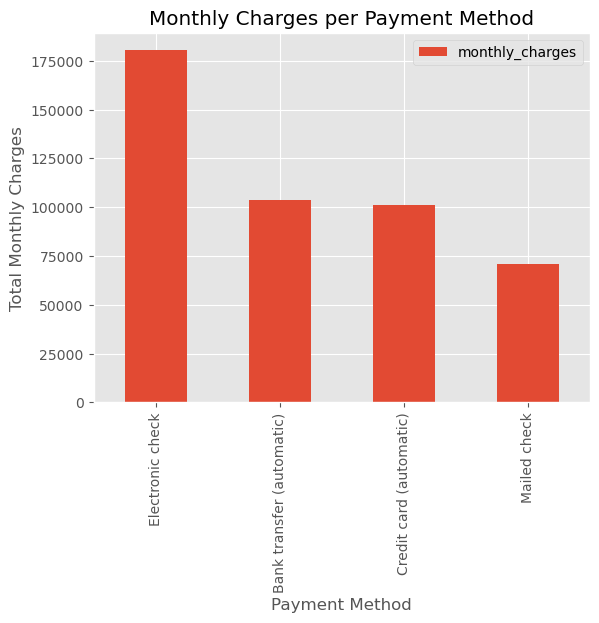

CPU times: user 164 ms, sys: 8.75 ms, total: 173 ms
Wall time: 172 ms


In [34]:
%%time
df_payments = df_customer_info.groupby('payment_method')['monthly_charges'].sum().sort_values(ascending=False).reset_index().rename(columns={0:'payment_method', 'monthly_charges':'monthly_charges'}).head(50)

df_payments.plot(kind='bar',
              x='payment_method',
              y='monthly_charges',
              #bins=20,
              xlabel='Payment Method',
              ylabel='Total Monthly Charges',
              title='Monthly Charges per Payment Method')
plt.xticks(rotation=90)
plt.show()

This graph looks at the volume of customers who choose each internet service, or choose no internet plan. 21% of customers have no internet service listed for their contract, but for those who do, fiber optic is the more popular choice.

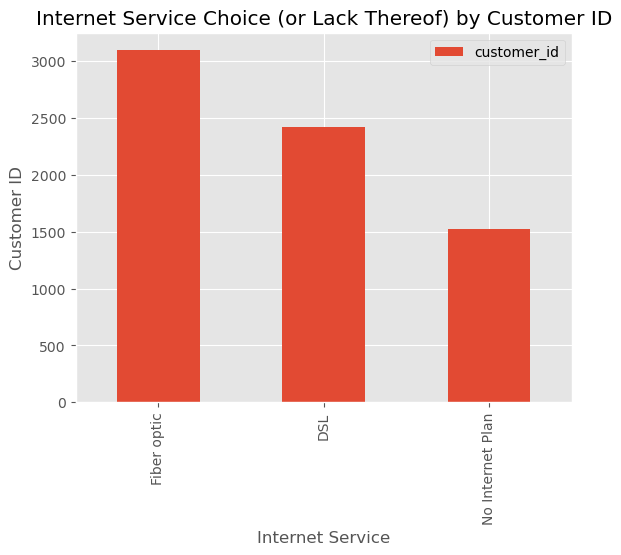

The percentage of customers that do not have a listed internet plan is 21.666903308249324 %
CPU times: user 153 ms, sys: 7.89 ms, total: 161 ms
Wall time: 172 ms


In [35]:
%%time
df_internet_choice = df_customer_info.groupby('internet_service')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'internet_service', 'customer_id':'customer_id'}).head(50)

df_internet_choice.plot(kind='bar',
              x='internet_service',
              y='customer_id',
              #bins=20,
              xlabel='Internet Service',
              ylabel='Customer ID',
              title='Internet Service Choice (or Lack Thereof) by Customer ID')
plt.xticks(rotation=90)
plt.show()

internet_service_data = len(df_customer_info[df_customer_info['internet_service'] == 'No Internet Plan']) / len(df_customer_info['internet_service']) * 100
print('The percentage of customers that do not have a listed internet plan is', internet_service_data, '%')


This graph looks at the volume of customers who choose to have a single phone line, multiple phone lines, or choose not to have a phone plan. 9% of customers have no phone service listed for their contract, but for those who do, it is actually fairly even between single and multiple phone lines. That being said, only having one phone line is a more popular option.

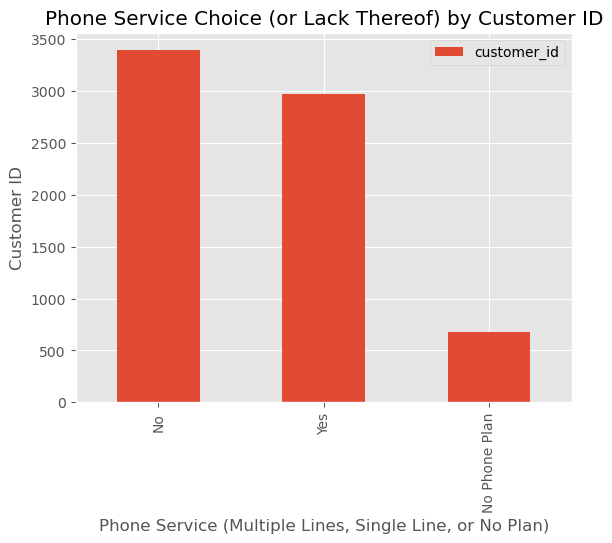

The percentage of customers that do not have a listed phone plan is 9.683373562402386 %
CPU times: user 160 ms, sys: 9.14 ms, total: 169 ms
Wall time: 172 ms


In [36]:
%%time
df_phone_choice = df_customer_info.groupby('multiple_lines')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'multiple_lines', 'customer_id':'customer_id'}).head(50)

df_phone_choice.plot(kind='bar',
              x='multiple_lines',
              y='customer_id',
              #bins=20,
              xlabel='Phone Service (Multiple Lines, Single Line, or No Plan)',
              ylabel='Customer ID',
              title='Phone Service Choice (or Lack Thereof) by Customer ID')
plt.xticks(rotation=90)
plt.show()

phone_service_data = len(df_customer_info[df_customer_info['multiple_lines'] == 'No Phone Plan']) / len(df_customer_info['multiple_lines']) * 100
print('The percentage of customers that do not have a listed phone plan is', phone_service_data, '%')

These boxplots look at total charges and monthly charges. 

CPU times: user 25.4 ms, sys: 2.62 ms, total: 28 ms
Wall time: 26 ms


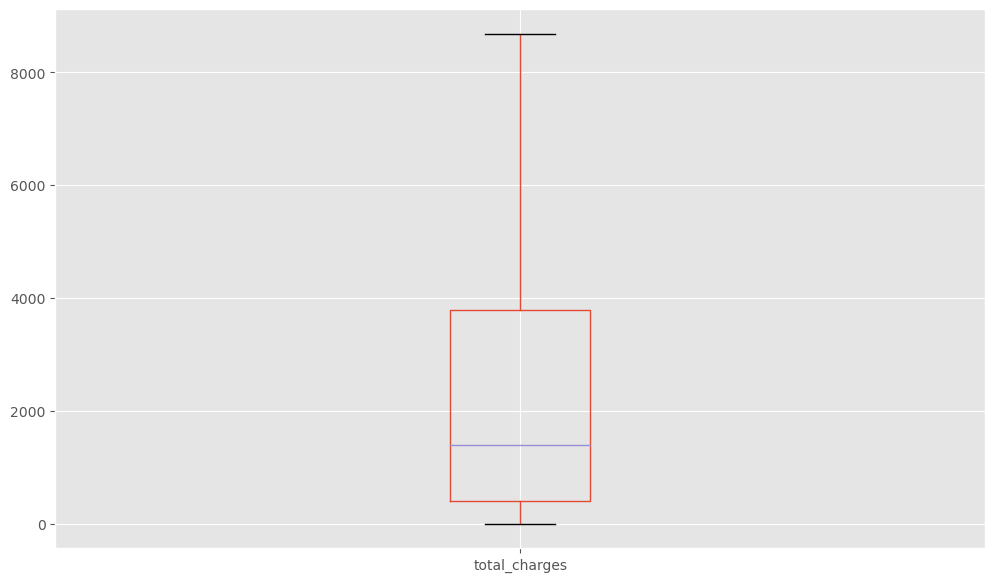

In [37]:
%%time
total_charge_boxplot = df_customer_info.boxplot('total_charges', figsize=(12,7))

CPU times: user 24.7 ms, sys: 2.49 ms, total: 27.2 ms
Wall time: 25.4 ms


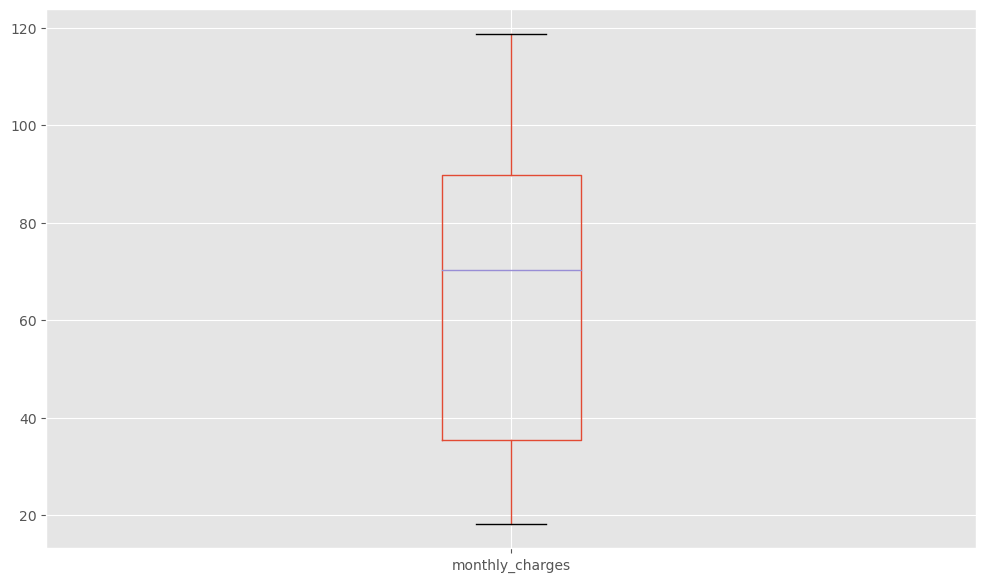

In [38]:
%%time
monthly_charge_boxplot = df_customer_info.boxplot('monthly_charges', figsize=(12,7))

This code creates a "has_end_date" column to use as a target for the machine learning models. 1 means "yes" and 0 means "no". Any value in "end_date" that has a date is transformed to a 1 in "has_end_date", and any value that is "No" is transformed to a 0. They are then transformed into numeric values for training and testing.

In [39]:
%%time
df_customer_info['has_end_date'] = ''

CPU times: user 297 µs, sys: 28 µs, total: 325 µs
Wall time: 310 µs


In [40]:
%%time
df_customer_info['has_end_date'] = df_customer_info['has_end_date'].where((df_customer_info['end_date'] == 'No') , 1) 
df_customer_info['has_end_date'] = df_customer_info['has_end_date'].where((df_customer_info['end_date'] != 'No') , 0) 


CPU times: user 2.59 ms, sys: 188 µs, total: 2.78 ms
Wall time: 2.7 ms


In [41]:
%%time
#print(df_customer_info['has_end_date'].isna().sum())
df_customer_info['has_end_date'] = pd.to_numeric(df_customer_info['has_end_date'], errors='coerce')


CPU times: user 839 µs, sys: 141 µs, total: 980 µs
Wall time: 904 µs


In [42]:
%%time
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [43]:
%%time
display(df_customer_info.sample(15))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,has_end_date
6864,5480-HPRRX,2019-10-01,2020-01-01 00:00:00,Month-to-month,No,Electronic check,25.30,77.75,Female,1,...,No,DSL,No,No,No,No,No,No,No Phone Plan,1
724,5244-IRFIH,2017-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,94.50,3105.55,Male,1,...,No,Fiber optic,No,No,No,No,Yes,Yes,Yes,1
1597,5327-CNLUQ,2016-02-01,No,Two year,Yes,Bank transfer (automatic),96.90,4473.45,Male,0,...,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,Yes,0
4221,7926-IJOOU,2020-01-01,No,Month-to-month,No,Credit card (automatic),19.30,19.30,Male,0,...,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No,0
2216,8495-LJDFO,2014-10-01,No,Month-to-month,Yes,Bank transfer (automatic),108.95,7111.30,Female,1,...,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,0
27,8665-UTDHZ,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.20,Male,0,...,Yes,DSL,No,Yes,No,No,No,No,No Phone Plan,1
1130,5859-HZYLF,2017-12-01,No,Two year,Yes,Credit card (automatic),19.15,515.75,Male,0,...,Yes,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No,0
3043,3677-IYRBF,2019-11-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,30.40,78.65,Female,1,...,No,DSL,No,No,Yes,No,No,No,No Phone Plan,1
4541,9058-CBREO,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Mailed check,50.55,50.55,Female,1,...,No,DSL,No,No,No,No,No,No,Yes,1
686,5313-FPXWG,2015-11-01,No,One year,Yes,Bank transfer (automatic),24.60,1266.40,Male,0,...,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,Yes,0


CPU times: user 18.2 ms, sys: 1.85 ms, total: 20 ms
Wall time: 18.7 ms


<h2>Encoding Categorical Variables</h2>
Label Encoding for Most Models and One-Hot Encoding for XGBoost

In [44]:
%%time
categorical_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


In [45]:
%%time
df_customer_info_encoded = pd.get_dummies(df_customer_info, columns=categorical_features, drop_first=True)

CPU times: user 17.8 ms, sys: 2.91 ms, total: 20.7 ms
Wall time: 19.6 ms


In [46]:
%%time
df_customer_info_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             7043 non-null   object        
 1   begin_date                              7043 non-null   datetime64[ns]
 2   end_date                                7043 non-null   object        
 3   monthly_charges                         7043 non-null   float64       
 4   total_charges                           7043 non-null   float64       
 5   senior_citizen                          7043 non-null   int64         
 6   has_end_date                            7043 non-null   int64         
 7   type_One year                           7043 non-null   bool          
 8   type_Two year                           7043 non-null   bool          
 9   paperless_billing_Yes                   7043 non-nul

In [47]:
%%time
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_customer_info[col] = le.fit_transform(df_customer_info[col])
    label_encoders[col] = le

CPU times: user 18 ms, sys: 483 µs, total: 18.5 ms
Wall time: 18.5 ms


<h2>Splitting the Data</h2>
This splits the data into 60/20/20 for training/validation/testing.

In [48]:
%%time
X = df_customer_info.drop(['customer_id', 'begin_date', 'end_date', 'has_end_date'], axis=1)
y = df_customer_info.has_end_date

X_train1, X_test, y_train1, y_test = train_test_split (X, y, test_size=0.20, random_state=54321)
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.25, random_state=54321)

CPU times: user 8.62 ms, sys: 2.42 ms, total: 11 ms
Wall time: 9.76 ms


In [49]:
%%time
X_encoded = df_customer_info_encoded.drop(['customer_id', 'begin_date', 'end_date', 'has_end_date'], axis=1)
y_encoded = df_customer_info_encoded.has_end_date

X_train1_encoded, X_test_encoded, y_train1_encoded, y_test_encoded = train_test_split (X_encoded, y_encoded, test_size=0.20, random_state=54321)
X_train_encoded, X_valid_encoded, y_train_encoded, y_valid_encoded = train_test_split(X_train1_encoded, y_train1_encoded, test_size=0.25, random_state=54321)

CPU times: user 7.29 ms, sys: 1.85 ms, total: 9.14 ms
Wall time: 7.95 ms


<h2>Scaling the Data</h2>

Because there are a couple numeric columns with values that are quite different, I scaled the data accoredingly.

In [50]:
%%time
numeric = ['monthly_charges', 'total_charges']

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


In [51]:
%%time
def scaling(features_train, features_test, features_valid):
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    #display(features_train.sample(10))
    #display(features_test.sample(10))
    return features_train, features_test, features_valid

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [52]:
%%time
scaling(X_train, X_test, X_valid)

CPU times: user 8.41 ms, sys: 1.5 ms, total: 9.92 ms
Wall time: 8.68 ms


(      type  paperless_billing  payment_method  monthly_charges  total_charges  \
 5997     0                  1               2         0.812812      -0.775064   
 2115     2                  1               2         1.776911       2.691718   
 4712     1                  1               2         1.429969       1.359153   
 2185     0                  0               2        -0.354783      -0.431445   
 5496     2                  0               3        -1.372258      -0.545270   
 ...    ...                ...             ...              ...            ...   
 3692     0                  1               0         0.125599      -0.914020   
 1286     1                  0               1         0.290730      -0.984406   
 4687     0                  1               1         0.977943      -0.179145   
 5077     2                  0               3        -1.519041      -0.953763   
 4737     2                  1               0         1.671828       2.619604   
 
       gender 

In [53]:
%%time
scaling(X_train_encoded, X_test_encoded, X_valid_encoded)

CPU times: user 8.19 ms, sys: 1.56 ms, total: 9.75 ms
Wall time: 8.46 ms


(      monthly_charges  total_charges  senior_citizen  type_One year  \
 5997         0.812812      -0.775064               0          False   
 2115         1.776911       2.691718               0          False   
 4712         1.429969       1.359153               0           True   
 2185        -0.354783      -0.431445               0          False   
 5496        -1.372258      -0.545270               0          False   
 ...               ...            ...             ...            ...   
 3692         0.125599      -0.914020               0          False   
 1286         0.290730      -0.984406               0           True   
 4687         0.977943      -0.179145               0          False   
 5077        -1.519041      -0.953763               0          False   
 4737         1.671828       2.619604               0          False   
 
       type_Two year  paperless_billing_Yes  \
 5997          False                   True   
 2115           True                   T

<h2>Upsampling and Downsampling</h2>
For future use with the chosen models

In [54]:
%%time
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=54321)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=54321)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=54321
    )

    return features_downsampled, target_downsampled


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [55]:
%%time
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321
    )

    return features_upsampled, target_upsampled

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [56]:
%%time
upsample_X_train, upsample_y_train = upsample(X_train, y_train, 5)
downsample_X_train, downsample_y_train = downsample(X_train, y_train, 0.2)

CPU times: user 15.6 ms, sys: 3.32 ms, total: 18.9 ms
Wall time: 17.6 ms


In [57]:
%%time
upsample_X_train_encoded, upsample_y_train_encoded = upsample(X_train_encoded, y_train_encoded, 5)
downsample_X_train_encoded, downsample_y_train_encoded = downsample(X_train_encoded, y_train_encoded, 0.2)

CPU times: user 13.3 ms, sys: 1.99 ms, total: 15.3 ms
Wall time: 14.1 ms


<h2>Evaluation - AUC-ROC</h2>
This is the metric we will evaluate the models by. This function will calculate the area under the curve and then also display the graph.

In [58]:
%%time
def scores_auc (model_name, features_name, target_name):
    probabilities_valid = model_name.predict_proba(features_name)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_name, probabilities_one_valid)
    print(auc_roc)
    
    fpr, tpr, thresholds = roc_curve(target_name, probabilities_one_valid) 

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show() 
    return

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs


<h2>Models</h2>
In order to evaluate models effectively, I created a dummy classifier model. I then evaluated three models that do not use gradient boosting, and three models that do. I also used the upsampled and downsampled data, as well as the data as is (after encoding and scaling) to evaluate the best way to obtain the most effective model.

<h3>Dummy Model</h3>

In [59]:
%%time
dummy_class = DummyClassifier(strategy='uniform')
dummy_class.fit(X_train_encoded, y_train_encoded)

CPU times: user 1.05 ms, sys: 600 µs, total: 1.65 ms
Wall time: 1.12 ms


DummyClassifier(strategy='uniform')

0.5


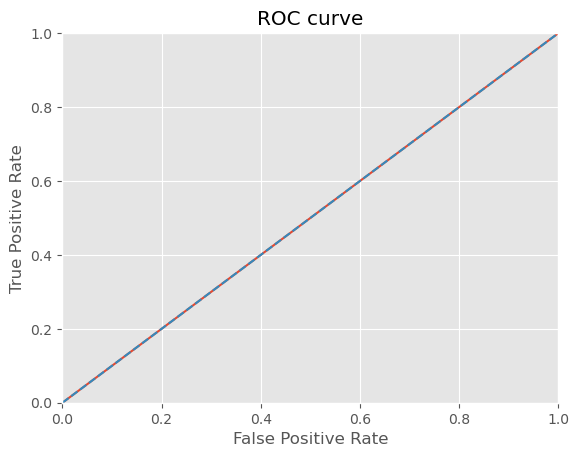

CPU times: user 141 ms, sys: 6.94 ms, total: 148 ms
Wall time: 146 ms


In [60]:
%%time
scores_auc(dummy_class, X_train_encoded, y_train_encoded)

Initially I wrote the functions for all the models. I can then call them and the evaluation function later.

<h3>Decision Tree Classifier</h3>

In [61]:
%%time
def train_decision_model(a, b, train_features_train, target_train):
    best_decision_f1 = 0
    best_depth = 0

    for depth in range(a,b):
        decision_model = DecisionTreeClassifier(random_state=54321, max_depth=depth, class_weight='balanced')
        decision_model.fit(train_features_train, target_train)
        decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(decision_scores) / len(decision_scores)
        #print('The F1 score for', depth, 'is', final_score) 
          
        if best_decision_f1 == 0:
            best_decision_f1 = final_score
            best_depth = depth
        if final_score > best_decision_f1:
            best_decision_f1 = final_score
            best_depth = depth
            
            

                
    decided_decision_model = DecisionTreeClassifier(random_state=54321, max_depth=best_depth, class_weight='balanced')
    decided_decision_model.fit(train_features_train, target_train)
    decided_decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    decided_final_score = sum(decided_decision_scores) / len(decided_decision_scores) 
    print(best_depth)
    print(decided_final_score)
    
    return decided_decision_model

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


<h3>Random Forest Classifier</h3>

In [62]:
%%time
def train_random_model(a, b, train_features_train, target_train):
    best_random_f1 = 0
    best_est = 0

    for est in range(a,b):
        random_model = RandomForestClassifier(random_state=54321, n_estimators=est, class_weight='balanced')
        random_model.fit(train_features_train, target_train)
        random_scores = cross_val_score(random_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(random_scores) / len(random_scores)
        #print('The F1 score for', est, 'is', final_score) 
  
        if best_random_f1 == 0:
            best_random_f1 = final_score
            best_est = est
        if final_score > best_random_f1:
            best_random_f1 = final_score
            best_est = est
            

    final_random_model = RandomForestClassifier(random_state=54321, n_estimators=best_est, class_weight='balanced')
    final_random_model.fit(train_features_train, target_train)
    final_random_scores = cross_val_score(final_random_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_random_scores) / len(final_random_scores)
    print(best_est)
    print('The final F1 for', best_est, 'is', final_final_score)

    return final_random_model

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


<h3>Logistic Regression</h3>

In [63]:
%%time
def train_logistic_model(features_train, target_train):
    logistic_model = LogisticRegression(class_weight='balanced')
    logistic_model.fit(features_train, target_train)
    return logistic_model

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


<h3>LightGBM</h3>

In [64]:
%%time
def lgbm(a, b, features_train, target_train):
    best_lgbm_f1 = 0
    best_est = 0

    for est in range(a,b):
        lgbm_model = LGBMClassifier(num_leaves=5, n_estimators=est, random_state=54321, class_weight='balanced')
        lgbm_model.fit(features_train, target_train)
        lgbm_scores = cross_val_score(lgbm_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(lgbm_scores) / len(lgbm_scores)
        #print('The F1 score for', est, 'is', final_score) 
  
        if best_lgbm_f1 == 0:
            best_lgbm_f1 = final_score
            best_est = est
        if final_score > best_lgbm_f1:
            best_lgbm_f1 = final_score
            best_est = est

            
    final_lgbm_model = LGBMClassifier(num_leaves=5, max_depth=10, n_estimators=best_est, random_state=54321, class_weight='balanced')
    final_lgbm_model.fit(features_train, target_train)
    final_lgbm_scores = cross_val_score(final_lgbm_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_lgbm_scores) / len(final_lgbm_scores)

    print('The final F1 for', best_est, 'is', final_final_score) 
    return final_lgbm_model

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


<h3>CatBoost</h3>

In [65]:
%%time
def cat(a, b, features_train, target_train):
    best_cat_f1 = 0
    best_its = 0

    for its in range(a,b):
        cat_model = CatBoostClassifier(loss_function="Logloss", iterations=its, random_seed=54321)
        cat_model.fit(features_train, target_train, cat_features=categorical_features, verbose=10)

        cat_scores = cross_val_score(cat_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(cat_scores) / len(cat_scores)
        #print('The F1 score for', its, 'is', final_score) 
  
        if best_cat_f1 == 0:
            best_cat_f1 = final_score
            best_its = its
        if final_score > best_cat_f1:
            best_cat_f1 = final_score
            best_its = its
            

    final_cat_model = CatBoostClassifier(loss_function='Logloss', iterations=best_its, random_seed=54321)
    final_cat_model.fit(features_train, target_train, cat_features=categorical_features, verbose=10)
    final_cat_scores = cross_val_score(cat_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_cat_scores) / len(final_cat_scores)
    print('The final F1 for', best_its, 'is', final_final_score) 
    return final_cat_model

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


<h3>XGBoost<h3>

In [66]:
%%time
def xgb(a, b, features_train, target_train):
    best_xgb_f1 = 0
    best_est = 0

    # Set class weights
    class_weights = {0: 1, 1: 10}  # Class 0: 1, Class 1: 10

    # Set "scale_pos_weight" based on class balance
    pos_weight = sum(class_weights.values()) / sum(class_weights.keys())

    for est in range(a,b):
        xgb_model = XGBClassifier(scale_pos_weight=pos_weight, objective='binary:logistic', n_estimators=est, random_state=42)
        xgb_model.fit(features_train, target_train)
        xgb_scores = cross_val_score(xgb_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(xgb_scores) / len(xgb_scores)
        #print('The F1 score for', est, 'is', final_score) 
  
        if best_xgb_f1 == 0:
            best_xgb_f1 = final_score
            best_est = est
        if final_score > best_xgb_f1:
            best_xgb_f1 = final_score
            best_est = est
            

    final_xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=best_est, random_state=42)
    final_xgb_model.fit(features_train, target_train)
    final_xgb_scores = cross_val_score(xgb_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_xgb_scores) / len(final_xgb_scores)
    print('The final F1 score for', best_est, 'is', final_final_score)

    return final_xgb_model

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


<h2>Calling the Models and Looking at the Curves</h2>

The decision model is one of the models that does not perform as well, even with upsampled and downsampled data for training. We want the area under the curve to be larger than it is here. It will likely not be the final model choice.

21
0.47459189554568243
0.6610336097548373


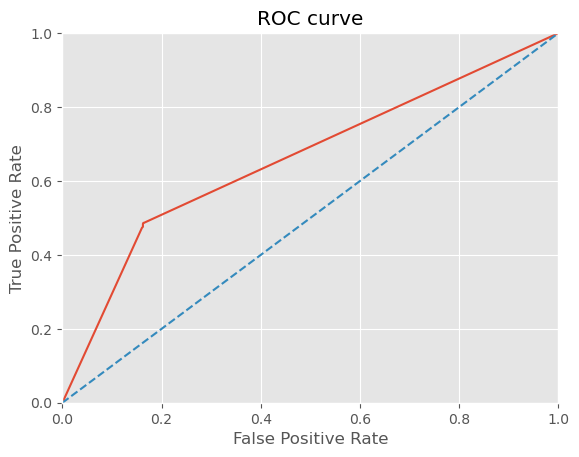

24
0.9424580206623151
0.6563370275646492


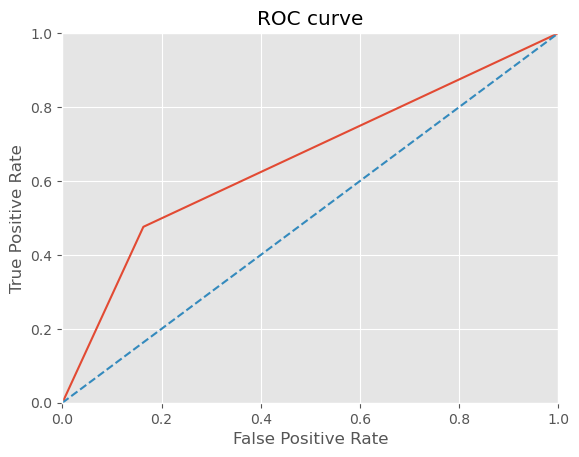

23
0.7695762250389011
0.6894908160892815


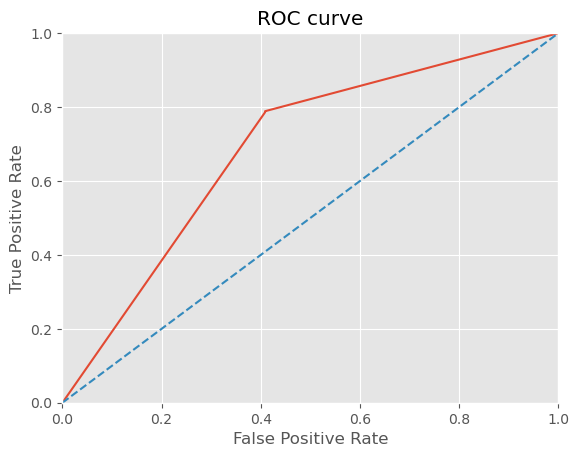

CPU times: user 6.61 s, sys: 145 ms, total: 6.75 s
Wall time: 6.8 s


In [67]:
%%time
decision_AUC = train_decision_model(21, 41, X_train, y_train)
scores_auc(decision_AUC, X_valid, y_valid)

upsample_decision_AUC = train_decision_model(21, 41, upsample_X_train, upsample_y_train)
scores_auc(upsample_decision_AUC, X_valid, y_valid)

downsample_decision_AUC = train_decision_model(21, 41, downsample_X_train, downsample_y_train)
scores_auc(downsample_decision_AUC, X_valid, y_valid)



The random model is the second non-gradient model, and while it performs better than the decision tree model (especially with downsampled training data), I still want to try to do better.

7
The final F1 for 7 is 0.511141937945492
0.7843085587331111


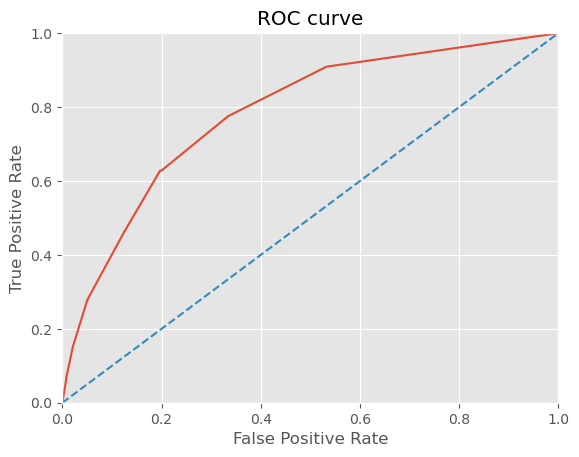

6
The final F1 for 6 is 0.9507346606511129
0.7800434007595133


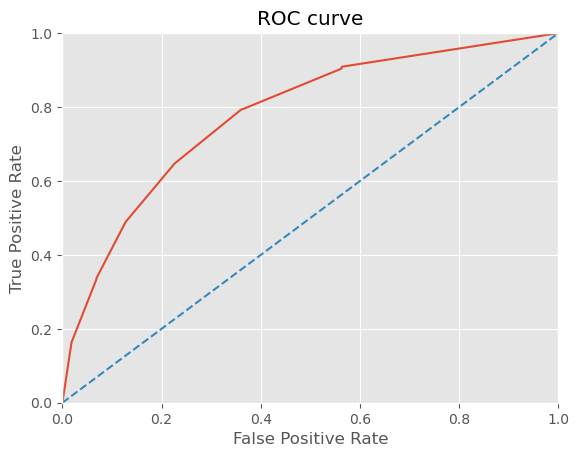

9
The final F1 for 9 is 0.8150806249682889
0.8129621018367821


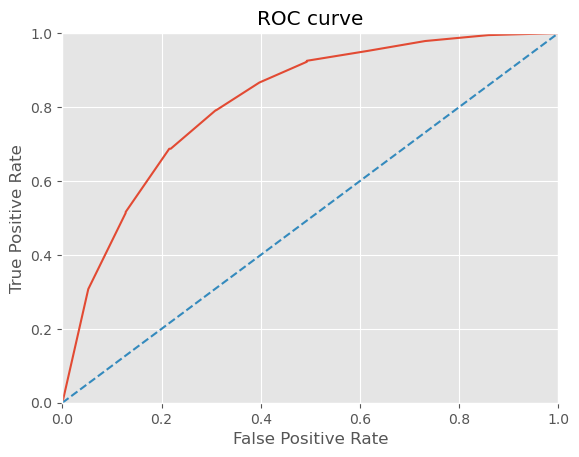

CPU times: user 5.52 s, sys: 155 ms, total: 5.68 s
Wall time: 5.72 s


In [68]:
%%time
random_AUC = train_random_model(1, 11, X_train, y_train)
scores_auc(random_AUC, X_valid, y_valid)

upsample_random_AUC = train_random_model(1, 11, upsample_X_train, upsample_y_train)
scores_auc(upsample_random_AUC, X_valid, y_valid)

downsample_random_AUC = train_random_model(1, 11, downsample_X_train, downsample_y_train)
scores_auc(downsample_random_AUC, X_valid, y_valid)

The logistic regrssion model is the final non-gradient model, and it performs the best of the three. The scores for the original and upsampled data are identical, and the downsampled data is slightly lower. Next we will move on to the gradient boosting models to see how they perform.

0.8428479165052055


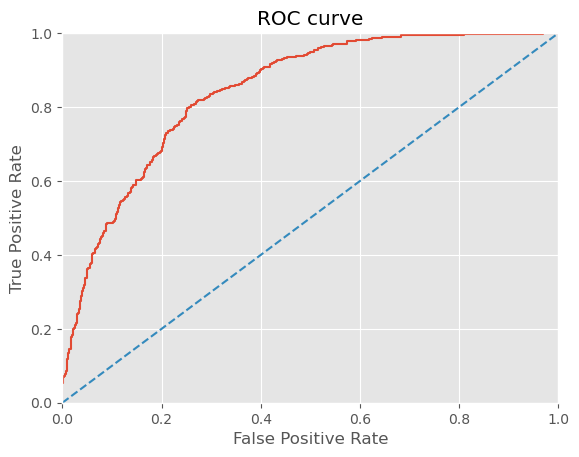

0.8428479165052054


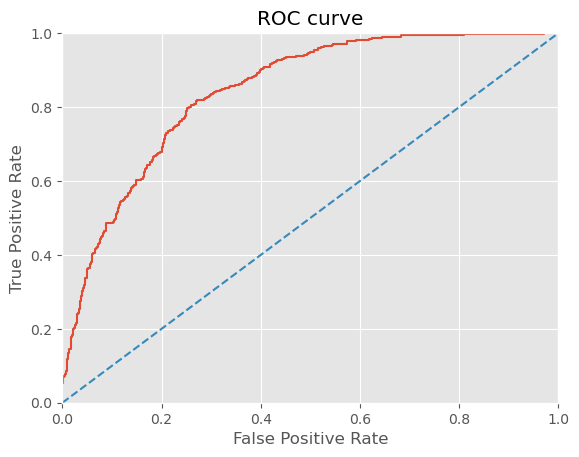

0.8408406313777157


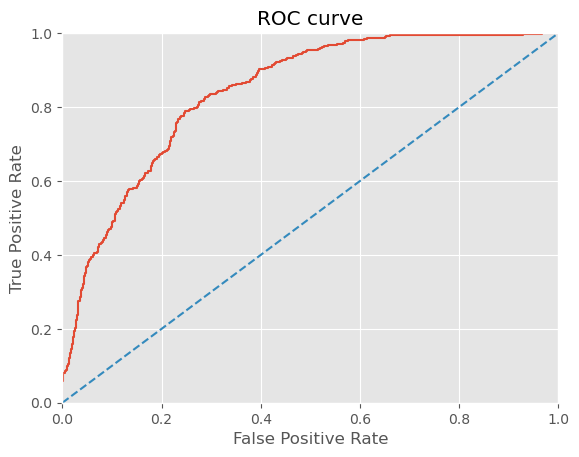

CPU times: user 2.69 s, sys: 84.3 ms, total: 2.78 s
Wall time: 476 ms


In [69]:
%%time
logistic_AUC = train_logistic_model(X_train, y_train)
scores_auc(logistic_AUC, X_valid, y_valid)

upsample_logistic_AUC = train_logistic_model(upsample_X_train, upsample_y_train)
scores_auc(upsample_logistic_AUC, X_valid, y_valid)

downsample_logistic_AUC = train_logistic_model(downsample_X_train, downsample_y_train)
scores_auc(downsample_logistic_AUC, X_valid, y_valid)

The LightGBM model is a gradient boosting model, which uses boosting algorithms to improve predictions and their metrics. This is reflected slightly in the AUC-ROC scores seen here. All the models after this are gradient boosting.

The final F1 for 10 is 0.5977240531959523
0.8477808778320289


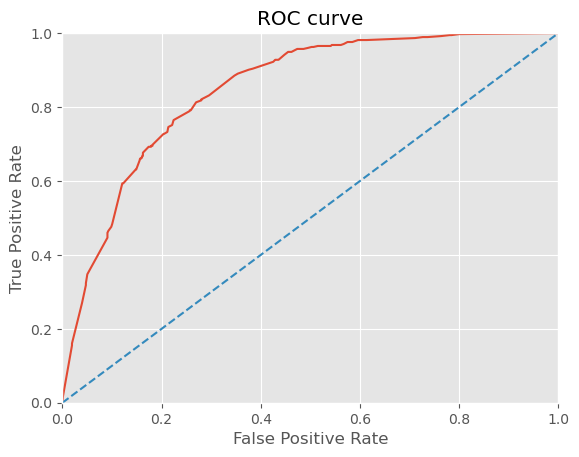

The final F1 for 5 is 0.8151954639718143
0.8444147355912062


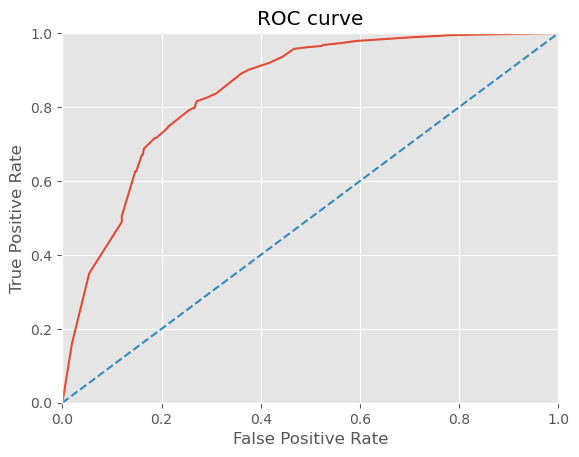

The final F1 for 10 is 0.7999403745620636
0.8460267638016998


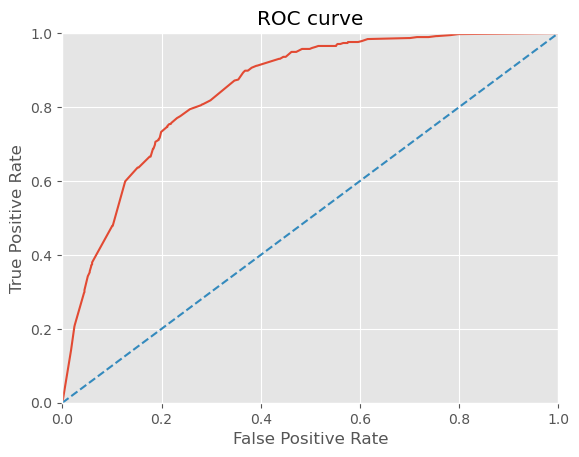

CPU times: user 37 s, sys: 2.98 s, total: 40 s
Wall time: 4.1 s


In [70]:
%%time
lgbm_AUC = lgbm(1, 11, X_train, y_train)
scores_auc(lgbm_AUC, X_valid, y_valid)

upsample_lgbm_AUC = lgbm(1, 11, upsample_X_train, upsample_y_train)
scores_auc(upsample_lgbm_AUC, X_valid, y_valid)

downsample_lgbm_AUC = lgbm(1, 11, downsample_X_train, downsample_y_train)
scores_auc(downsample_lgbm_AUC, X_valid, y_valid)

The CatBoost model improves even more, with the original data performing best with neither upsampling or downsampling. This may be the model that ultimately gets chosen.

Learning rate set to 0.5
0:	learn: 0.5522488	total: 54.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5546296	total: 1.66ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5424313	total: 1.13ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5556605	total: 1.18ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5510268	total: 948us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5513669	total: 974us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5522488	total: 2.91ms	remaining: 2.91ms
1:	learn: 0.4958042	total: 6.23ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5546296	total: 955us	remaining: 955us
1:	learn: 0.4997842	total: 1.88ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5424313	total: 960us	remaining: 960us
1:	learn: 0.4877038	total: 1.88ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5556605	total: 1.23ms	remaining: 1.23ms
1:	learn: 0.5024842	total: 2.42ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5510268	total: 1.03ms

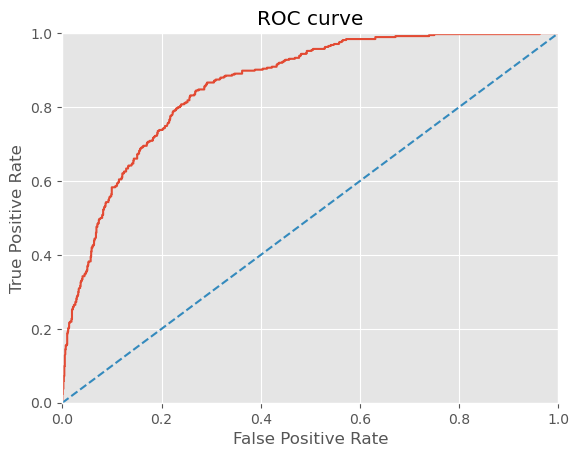

Learning rate set to 0.5
0:	learn: 0.5637846	total: 2.74ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637104	total: 1.31ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5570743	total: 1.25ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5576337	total: 1.19ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5561102	total: 1.03ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5579948	total: 1.11ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637846	total: 2.69ms	remaining: 2.69ms
1:	learn: 0.5121020	total: 4.73ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637104	total: 1.24ms	remaining: 1.24ms
1:	learn: 0.5144489	total: 2.37ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5570743	total: 1.05ms	remaining: 1.05ms
1:	learn: 0.5034555	total: 2.15ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5576337	total: 970us	remaining: 970us
1:	learn: 0.5045670	total: 2.02ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5561102	total: 97

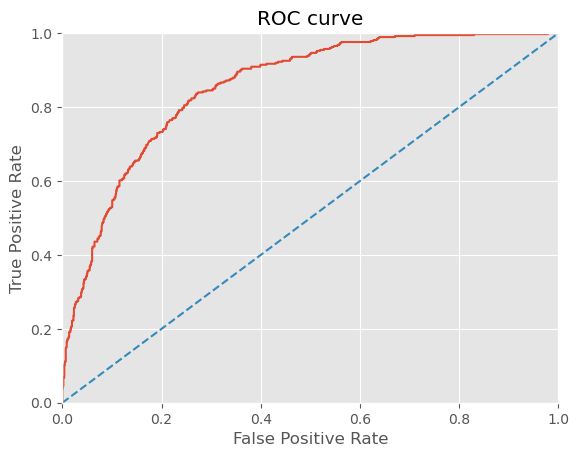

Learning rate set to 0.5
0:	learn: 0.5784657	total: 1.49ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5633359	total: 1.28ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5765144	total: 951us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5734046	total: 701us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5840509	total: 749us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5728187	total: 736us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5784657	total: 1.19ms	remaining: 1.19ms
1:	learn: 0.5279696	total: 2.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5633359	total: 724us	remaining: 724us
1:	learn: 0.5147312	total: 1.32ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5765144	total: 645us	remaining: 645us
1:	learn: 0.5252936	total: 1.29ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5734046	total: 665us	remaining: 665us
1:	learn: 0.5271764	total: 1.37ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5840509	total: 636us	remai

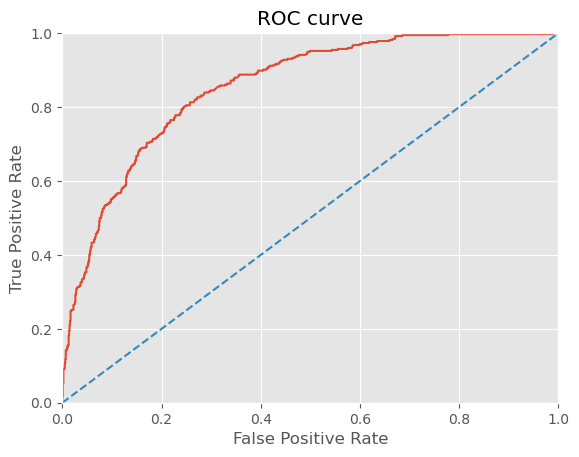

CPU times: user 1min 42s, sys: 28.7 s, total: 2min 11s
Wall time: 26.4 s


In [71]:
%%time
cat_AUC = cat(1, 41, X_train, y_train)
scores_auc(cat_AUC, X_valid, y_valid)

upsample_cat_AUC = cat(1, 41, upsample_X_train, upsample_y_train)
scores_auc(upsample_cat_AUC, X_valid, y_valid)

downsample_cat_AUC = cat(1, 41, downsample_X_train, downsample_y_train)
scores_auc(downsample_cat_AUC, X_valid, y_valid)

The XGBoost model, which requires one-hot-encoded data, also performs quite well, with the original data also performing best, but not quite as well as the CatBoost model. We will go with the CatBoost model as our final choice.

The final F1 score for 10 is 0.5668849698781615
0.8518651993076545


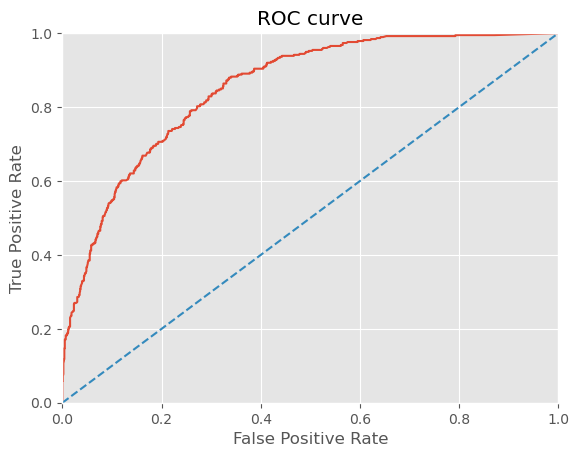

The final F1 score for 10 is 0.8551244535139759
0.8495982846366479


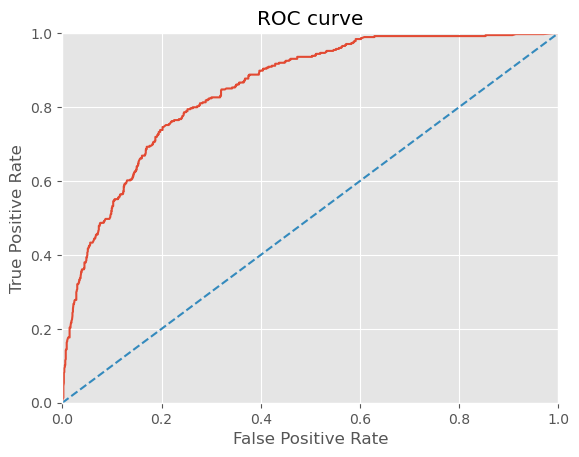

The final F1 score for 10 is 0.8320561479786768
0.8440763130021443


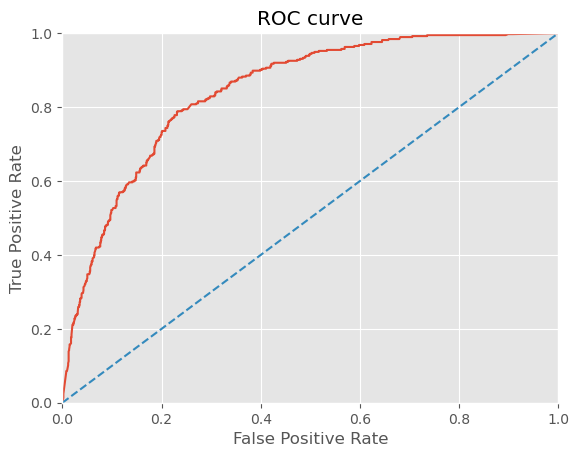

CPU times: user 1min 10s, sys: 3.48 s, total: 1min 14s
Wall time: 7.02 s


In [73]:
%%time
xgb_AUC = xgb(1, 11, X_train_encoded, y_train_encoded)
scores_auc(xgb_AUC, X_valid_encoded, y_valid_encoded)

upsample_xgb_AUC = xgb(1, 11, upsample_X_train_encoded, upsample_y_train_encoded)
scores_auc(upsample_xgb_AUC, X_valid_encoded, y_valid_encoded)

downsample_xgb_AUC = xgb(1, 11, downsample_X_train_encoded, downsample_y_train_encoded)
scores_auc(downsample_xgb_AUC, X_valid_encoded, y_valid_encoded)

<h2>Choosing a Model and Using the Test Data</h2>
CatBoost had the best AUC-ROC score, so that is the model I went with.

Learning rate set to 0.401821
0:	learn: 0.5659969	total: 1.77ms	remaining: 61.9ms
1:	learn: 0.5111477	total: 3.73ms	remaining: 63.5ms
2:	learn: 0.4733311	total: 5.1ms	remaining: 56.1ms
3:	learn: 0.4498419	total: 6.95ms	remaining: 55.6ms
4:	learn: 0.4331098	total: 8.3ms	remaining: 51.4ms
5:	learn: 0.4225317	total: 9.64ms	remaining: 48.2ms
6:	learn: 0.4146954	total: 11ms	remaining: 45.5ms
7:	learn: 0.4083307	total: 12.1ms	remaining: 42.2ms
8:	learn: 0.4044143	total: 13.4ms	remaining: 40.2ms
9:	learn: 0.4006890	total: 14.6ms	remaining: 38ms
10:	learn: 0.3980263	total: 15.9ms	remaining: 36.2ms
11:	learn: 0.3959769	total: 17.3ms	remaining: 34.7ms
12:	learn: 0.3940878	total: 18.6ms	remaining: 32.9ms
13:	learn: 0.3916761	total: 20.1ms	remaining: 31.6ms
14:	learn: 0.3887969	total: 21.4ms	remaining: 30ms
15:	learn: 0.3871081	total: 22.7ms	remaining: 28.4ms
16:	learn: 0.3857093	total: 23.9ms	remaining: 26.8ms
17:	learn: 0.3835847	total: 25ms	remaining: 25ms
18:	learn: 0.3821428	total: 26.2ms	rem

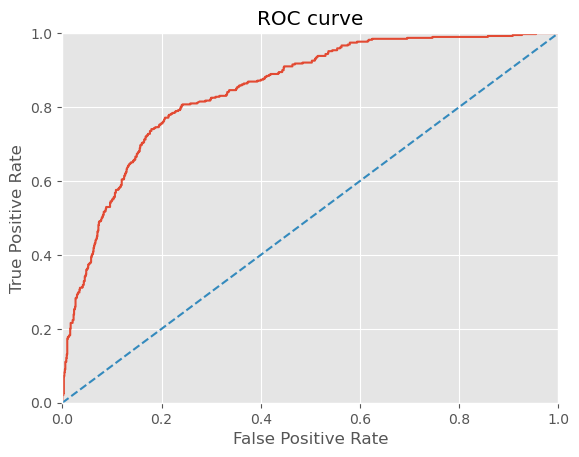

CPU times: user 309 ms, sys: 111 ms, total: 420 ms
Wall time: 195 ms


In [74]:
%%time
test_cat_model = CatBoostClassifier(loss_function="Logloss", iterations=36, random_seed=54321)
test_cat_model.fit(X_train, y_train)
scores_auc(test_cat_model, X_test, y_test)

<h2>Conclusions</h2>

The test AUC-ROC score is close to what it was with the validation data for the CatBoost model. I would recommend going with the CatBoost model to predict churn in the future. It can also likely be fine-tuned even further to promote even better scores.

<h1>Final Report</h1>

**A reminder of the work plan:**

1. Download the data.
2. Look at data samples and information about the datasets.
3. Conduct any necessary preprocessing to clean and prepare the data for further use. (This was partially done above, but after clarifications can be completed further.)
4. Merge the datasets into one dataframe for further processing and modeling.
5. Conduct exploratory data analysis to find any trends, characteristics, and relationships relevant to making predictions for Interconnect.
6. Use feature engineering to enhance the data for creating the data model. Add new "end date" target that is clearer (not a date and a string) andd senior citizen feature that is clearer as well
7. Encode the data.
8. Split the data into test, training, and validation sets for model training and testing.
9. Scale the data as needed. (This may not be necessary since the majority of the data is categorical and will be encoded, but will explore further).
10. Start testing models. Test multiple classification models, some with gradient boosting and some without.
11. Select a model based on required metric (AUC-ROC) performance and test it against test data.
12. Provide conclusions and recommendations to Interconnect.

**What steps of the plan were performed and what steps were skipped (explain why)?**

The work plan was completed as stated. At first I was not sure if additionaly steps would be needed, but it turned out that was not the case. No steps were skipped.

**What difficulties did you encounter and how did you manage to solve them?**

The main difficulty I encountered was the quality of the data. There were pieces missing, and it made merging the datasets slightly complicated. Some parts of the data that were missing had blank spaces rather than being null, which was misleading. Overall, though, the work I needed to do made these errors appear, and then I was able to resolve them. In the future, I will be more mindful that these types of issues. 

Another difficulty I ran into was that I thought the begin date would be important to the data model and wanted to include it. Ultimately though, I found that that was not feasible and dropped it. It turned out to be the right decision. In addition, the amount of EDA that would be possible seemed endless. It was a bit overwhelming choosing what to do. Ultimately, I decided to choose some basic things and let the models do a lot of the talking.

**What were some of the key steps to solving the task?**

One of the most important steps was preparing the data adequately. Preprocessing was extremely important to this task, and once the datasets were merged, the data was cleaned, and the datatypes were correct, the encoding, scaling, and modeling went relatively quickly.

Writing the models and evaluation metric functions was another key step. Having those functions ready to go made everything much easier, and fixing the functions was much easier than fixing individual code strings for each time I wanted to check different data I was running. 

Finally, understanding what the task required and what skills that I had learned throughout my time in this program saved me a lot of time. Knowing what I had learned and at what point I had learned it, and being able to find examples from previous projects, saved me a lot of time and energy in this task.

**What is your final model and what quality score does it have?**

For my final model I chose the CatBoost model with the original data (no up or downsampling), as it had an AUC-ROC score of .860 on the validation data. On the test data, it had an AUC-ROC score of .848.


